In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 45.4 MB/s 


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import pickle
from pprint import pprint
import re
#from wordcloud import WordCloud

from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
total_data= pd.read_csv('/content/drive/MyDrive/아로나민골드_2019_2022.csv',encoding='utf-8')
total_data

,Unnamed: 0,Unnamed: 0.1,날짜,제목,언론사명,분류,연도,달
0,35,35,20190130,황금돼지해 설 건강선물 1위 ‘활력 비타민’,헤럴드경제,기사,2019,1
1,36,36,20190126,"명절 건강 선물, 미래형 보약 대신 ‘현재형 원기회복’",헤럴드경제,기사,2019,1
2,37,37,20190122,"[정성 가득 설 선물] 일동제약, 국내 1위 피로회복제 '아로나민'",서울경제,기사,2019,1
3,38,38,20190218,['봄 불청객' 이겨내기] 일동제약 '아로나민',서울경제,기사,2019,2
4,39,39,20190216,"'SKY캐슬' 전성시대, 광고모델차기작… 배우들 '꽃길' [김유림의 연예담]",머니S,기사,2019,2
...,...,...,...,...,...,...,...,...
4156,6363,1399,20220316,나 아로나민골드 안 맞아 띵해지는.. 종합비타민 하나 사야겠.. \n루테인 오메가3...,NaN,트위터(RT 포함),2022,3
4157,6364,1400,20220315,@Ssomebody_KR 비타민 쏜리서치 투퍼데이 피로회복 아로나민골드 양늘어나는거...,NaN,트위터(RT 포함),2022,3
4158,6365,1401,20220314,"@twt_VAV 너는 내 멀티비타민, 박카스, 우루사, 아로나민골드, 오메가3 야~...",NaN,트위터(RT 포함),2022,3
4159,6366,1402,20220313,"그 시절 길용우 배우가 나온 아로나민 골드 광고\n\n아내가 ""쉬는 날엔 계속 잠만...",NaN,트위터(RT 포함),2022,3


In [ ]:
total_data=total_data[['날짜','제목','언론사명','분류','연도','달']]
total_data=total_data.drop_duplicates()
total_data

,날짜,제목,언론사명,분류,연도,달
0,20190130,황금돼지해 설 건강선물 1위 ‘활력 비타민’,헤럴드경제,기사,2019,1
1,20190126,"명절 건강 선물, 미래형 보약 대신 ‘현재형 원기회복’",헤럴드경제,기사,2019,1
2,20190122,"[정성 가득 설 선물] 일동제약, 국내 1위 피로회복제 '아로나민'",서울경제,기사,2019,1
3,20190218,['봄 불청객' 이겨내기] 일동제약 '아로나민',서울경제,기사,2019,2
4,20190216,"'SKY캐슬' 전성시대, 광고모델차기작… 배우들 '꽃길' [김유림의 연예담]",머니S,기사,2019,2
...,...,...,...,...,...,...
4156,20220316,나 아로나민골드 안 맞아 띵해지는.. 종합비타민 하나 사야겠.. \n루테인 오메가3...,NaN,트위터(RT 포함),2022,3
4157,20220315,@Ssomebody_KR 비타민 쏜리서치 투퍼데이 피로회복 아로나민골드 양늘어나는거...,NaN,트위터(RT 포함),2022,3
4158,20220314,"@twt_VAV 너는 내 멀티비타민, 박카스, 우루사, 아로나민골드, 오메가3 야~...",NaN,트위터(RT 포함),2022,3
4159,20220313,"그 시절 길용우 배우가 나온 아로나민 골드 광고\n\n아내가 ""쉬는 날엔 계속 잠만...",NaN,트위터(RT 포함),2022,3


In [ ]:
#데이터 프레임의 'text' 열의 값들을 str 형식으로 바꾸기
total_data.제목 = total_data.제목.astype(str)


#데이터 프레임의 'text' 열의 값 중 keyword1이나 keyword 2가 포함된 행은 삭제
#clean_Data = total_data[~total_data['제목'].str.contains('keyword1|keyword2')]


#text와 timestamp 열을 기준으로 중복된 데이터를 삭제, inplace : 데이터 프레임을 변경할지 선택(원본을 대체)
total_data.drop_duplicates(subset=['제목','날짜'], inplace=True)

#빈 문자열 NAN 값으로 바꾸기
total_data = total_data.replace({'': np.nan})
total_data = total_data.replace(r'^\s*$', None, regex=True)

#NAN 이 있는 행은 삭제
total_data.dropna(how='any', inplace=True)

#인덱스 차곡차곡
total_data = total_data.reset_index (drop = True)

#데이터 프레임에 null 값이 있는지 확인
print(total_data.isnull().values.any()) 

False


In [ ]:
#텍스트 데이터를 리스트로 변환
Data_li=total_data.제목.values.tolist()
Data_li

['황금돼지해 설 건강선물 1위 ‘활력 비타민’',
 '명절 건강 선물, 미래형 보약 대신 ‘현재형 원기회복’',
 "[정성 가득 설 선물] 일동제약, 국내 1위 피로회복제 '아로나민'",
 "['봄 불청객' 이겨내기] 일동제약 '아로나민'",
 "'SKY캐슬' 전성시대, 광고모델차기작… 배우들 '꽃길' [김유림의 연예담]",
 '아로나민 매출 780억원…3년 연속 일반의약품 1위',
 "계약한 광고만 벌써 10여개 ..끝나지 않은 'SKY캐슬'의 여운",
 '"OO를 집으로 들이십시오"…SKY캐슬 열풍에 광고시장도 들썩',
 '‘SKY캐슬’ 예서 건강CF 모델…출연진 주로 ‘웰빙’ 광고',
 '약사·의사 등과 함께 약학분야 지식 캠페인 활동',
 "[나른한 봄 건강 지키기] 일동제약 '아로나민'",
 "한 달前 종영했는데…제약업계는 아직 '스카이캐슬' 열풍",
 '아로나민, 지난해 일반의약품 매출 1위 차지…2017년 매출 정점찍고 하강그래프 그려',
 '지난해 일반약 매출 1위는 `아로나민`',
 "[건강하게 여름 나기]일동제약 '아로나민'",
 "'약사 유튜버'가 불지핀 아로나민 효능 논란",
 '"퇴근시켜주세요"...광고 속 달라진 직장 풍속도',
 '광고 모델된 90년대생 직장인',
 '일동제약, ‘아로나민골드’ 유튜브 논란 반박…“단점으로 보기 어렵다”',
 '일본 불매운동 동참한 약사들 … 약국서 일본 약 빼고 대체할 약 소개하고',
 "[무더위 뒤 건강관리]일동제약 '아로나민' 더위에 떨어진 면역력 쑥",
 '종합비타민 아로나민골드, 기존 가격 유지하며 소비자들에게 보답',
 '종합비타민 아로나민골드 7년 7개월째 가격유지 고수',
 "일동제약 '아로나민골드' 온가족 건강 위한 비타민 영양제",
 '오랜 사랑 받아 온 비타민 영양제는?',
 '일동제약, 아로나민 새 라인업 ‘케어 시리즈’ 출시··“총 4종으로 구성”',
 '일동제약 아로나민, 맞춤형 비타민 영양제 라인업 `케어 시리즈` 선봬',
 '일동제약, 아로나민 케어 시리즈 선봬… 심포지엄

In [ ]:
company=['임팩타민','비맥스메타','씨플러스','우루사','코엔자임']
out=list()

for i in Data_li:
  if company[0] in i or company[1] in i or company[2] in i or company[3] in i or company[4] in i:
    pass
  else:
    out.append(i)


In [ ]:
out

['황금돼지해 설 건강선물 1위 ‘활력 비타민’',
 '명절 건강 선물, 미래형 보약 대신 ‘현재형 원기회복’',
 "[정성 가득 설 선물] 일동제약, 국내 1위 피로회복제 '아로나민'",
 "['봄 불청객' 이겨내기] 일동제약 '아로나민'",
 "'SKY캐슬' 전성시대, 광고모델차기작… 배우들 '꽃길' [김유림의 연예담]",
 '아로나민 매출 780억원…3년 연속 일반의약품 1위',
 "계약한 광고만 벌써 10여개 ..끝나지 않은 'SKY캐슬'의 여운",
 '"OO를 집으로 들이십시오"…SKY캐슬 열풍에 광고시장도 들썩',
 '‘SKY캐슬’ 예서 건강CF 모델…출연진 주로 ‘웰빙’ 광고',
 '약사·의사 등과 함께 약학분야 지식 캠페인 활동',
 "[나른한 봄 건강 지키기] 일동제약 '아로나민'",
 "한 달前 종영했는데…제약업계는 아직 '스카이캐슬' 열풍",
 '아로나민, 지난해 일반의약품 매출 1위 차지…2017년 매출 정점찍고 하강그래프 그려',
 '지난해 일반약 매출 1위는 `아로나민`',
 "[건강하게 여름 나기]일동제약 '아로나민'",
 "'약사 유튜버'가 불지핀 아로나민 효능 논란",
 '"퇴근시켜주세요"...광고 속 달라진 직장 풍속도',
 '광고 모델된 90년대생 직장인',
 '일동제약, ‘아로나민골드’ 유튜브 논란 반박…“단점으로 보기 어렵다”',
 '일본 불매운동 동참한 약사들 … 약국서 일본 약 빼고 대체할 약 소개하고',
 "[무더위 뒤 건강관리]일동제약 '아로나민' 더위에 떨어진 면역력 쑥",
 '종합비타민 아로나민골드, 기존 가격 유지하며 소비자들에게 보답',
 '종합비타민 아로나민골드 7년 7개월째 가격유지 고수',
 "일동제약 '아로나민골드' 온가족 건강 위한 비타민 영양제",
 '오랜 사랑 받아 온 비타민 영양제는?',
 '일동제약, 아로나민 새 라인업 ‘케어 시리즈’ 출시··“총 4종으로 구성”',
 '일동제약 아로나민, 맞춤형 비타민 영양제 라인업 `케어 시리즈` 선봬',
 '일동제약, 아로나민 케어 시리즈 선봬… 심포지엄

In [ ]:
Data_list=out
Data_list

['황금돼지해 설 건강선물 1위 ‘활력 비타민’',
 '명절 건강 선물, 미래형 보약 대신 ‘현재형 원기회복’',
 "[정성 가득 설 선물] 일동제약, 국내 1위 피로회복제 '아로나민'",
 "['봄 불청객' 이겨내기] 일동제약 '아로나민'",
 "'SKY캐슬' 전성시대, 광고모델차기작… 배우들 '꽃길' [김유림의 연예담]",
 '아로나민 매출 780억원…3년 연속 일반의약품 1위',
 "계약한 광고만 벌써 10여개 ..끝나지 않은 'SKY캐슬'의 여운",
 '"OO를 집으로 들이십시오"…SKY캐슬 열풍에 광고시장도 들썩',
 '‘SKY캐슬’ 예서 건강CF 모델…출연진 주로 ‘웰빙’ 광고',
 '약사·의사 등과 함께 약학분야 지식 캠페인 활동',
 "[나른한 봄 건강 지키기] 일동제약 '아로나민'",
 "한 달前 종영했는데…제약업계는 아직 '스카이캐슬' 열풍",
 '아로나민, 지난해 일반의약품 매출 1위 차지…2017년 매출 정점찍고 하강그래프 그려',
 '지난해 일반약 매출 1위는 `아로나민`',
 "[건강하게 여름 나기]일동제약 '아로나민'",
 "'약사 유튜버'가 불지핀 아로나민 효능 논란",
 '"퇴근시켜주세요"...광고 속 달라진 직장 풍속도',
 '광고 모델된 90년대생 직장인',
 '일동제약, ‘아로나민골드’ 유튜브 논란 반박…“단점으로 보기 어렵다”',
 '일본 불매운동 동참한 약사들 … 약국서 일본 약 빼고 대체할 약 소개하고',
 "[무더위 뒤 건강관리]일동제약 '아로나민' 더위에 떨어진 면역력 쑥",
 '종합비타민 아로나민골드, 기존 가격 유지하며 소비자들에게 보답',
 '종합비타민 아로나민골드 7년 7개월째 가격유지 고수',
 "일동제약 '아로나민골드' 온가족 건강 위한 비타민 영양제",
 '오랜 사랑 받아 온 비타민 영양제는?',
 '일동제약, 아로나민 새 라인업 ‘케어 시리즈’ 출시··“총 4종으로 구성”',
 '일동제약 아로나민, 맞춤형 비타민 영양제 라인업 `케어 시리즈` 선봬',
 '일동제약, 아로나민 케어 시리즈 선봬… 심포지엄

In [ ]:
from konlpy.tag import Okt
okt = Okt()

In [ ]:
okt.nouns(Data_list[0])

['황금돼지', '설', '건강', '선물', '위', '활', '비타민']

In [ ]:

#리스트를 요소별로(트윗 하나) 가져와서 명사만 추출한 후 리스트로 저장
data_word=[]
#스탑워드
stopword=['로나', '민', '골드','아로','좀','양제','비타민','영',"제","거","요","뭐","알","살","수"]
for i in range(len(Data_list)):
  k=[]
  try:
      a=okt.nouns(Data_list[i])
      for j in a:
        if j not in stopword:
          k.append(j)
      data_word.append(k)
  except Exception as e:
        continue


#트윗에서 형태소 추출해서 만든 리스트
data_word

[['황금돼지', '설', '건강', '선물', '위', '활'],
 ['명절', '건강', '선물', '미래', '보약', '대신', '현재', '원기', '회복'],
 ['정성', '가득', '설', '선물', '일동제약', '국내', '위', '피로', '회복'],
 ['봄', '불청객', '일동제약'],
 ['캐슬', '전성', '시대', '광고', '모델', '차기작', '배우', '꽃길', '김유림', '예담'],
 ['매출', '연속', '일반의약품', '위'],
 ['계약', '광고', '벌써', '여개', '캐슬', '의', '여운'],
 ['를', '집', '캐슬', '열풍', '광고', '시장'],
 ['캐슬', '예서', '건강', '모델', '출연', '진', '주로', '웰빙', '광고'],
 ['약사', '의사', '등', '약학', '분야', '지식', '캠페인', '활동'],
 ['봄', '건강', '일동제약'],
 ['달', '종영', '제약업', '스카이', '캐슬', '열풍'],
 ['지난해', '일반의약품', '매출', '위', '차지', '매출', '정점', '하강', '그래프'],
 ['지난해', '일반', '약', '매출', '위'],
 ['여름', '나기', '일동제약'],
 ['약사', '유튜버', '불지', '핀', '효능', '논란'],
 ['퇴근', '광고', '속', '직장', '풍속'],
 ['광고', '모델', '직장인'],
 ['일동제약', '유튜브', '논란', '반박', '단점', '보기'],
 ['일본', '불매운동', '동참', '약사', '약국', '일본', '약', '대체', '약', '소개'],
 ['무더위', '뒤', '건강', '관리', '일동제약', '더위', '면역', '쑥'],
 ['종합', '기존', '가격', '유지', '소비자', '보답'],
 ['종합', '개월', '가격', '유지', '고수'],
 ['일동제약', '가족', '건강', '위'],
 ['사랑', '온'],


In [ ]:
from gensim import corpora

# 각 단어를 (단어id, 나온횟수) 로 바꾸는 작업
dictionary = corpora.Dictionary(data_word)
corpus = [dictionary.doc2bow(text) for text in data_word]

In [ ]:
import gensim

In [ ]:
import matplotlib.pyplot as plt
perplexity_values=[]
for i in range(2,15):
  ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=dictionary)
  perplexity_values.append(ldamodel.log_perplexity(corpus))

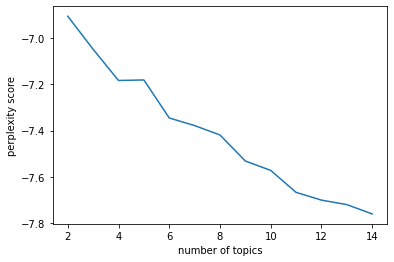

In [ ]:
x=range(2,15)
plt.plot(x,perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [ ]:
from gensim.models import CoherenceModel
coherance_values=[]
for i in range(2,15):
  ldamodel=gensim.models.ldamodel.LdaModel(corpus,num_topics=i,id2word=dictionary)
  coherance_model_lda=CoherenceModel(model=ldamodel,texts=data_word,dictionary=dictionary,topn=10)
  coherance_lda=coherance_model_lda.get_coherence()
  coherance_values.append(coherance_lda)

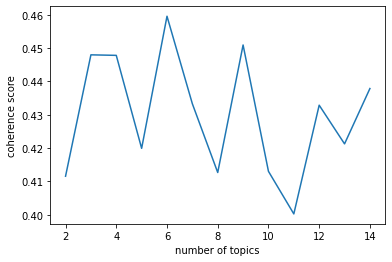

In [ ]:
x=range(2,15)
plt.plot(x,coherance_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [ ]:
# corpus[i] : i번째 뉴스에서 나온단어들을 가지고 (단어id, 나온횟수)들을 저장한 list
print(corpus[1]) 


# dictionary[j] : id값을 j를 가진 단어가 무엇인지 확인
print(dictionary[66])

[(0, 1), (1, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
나기


In [ ]:
import gensim

NUM_TOPICS = 6

# passes : 알고리즘 동작횟수, num_words : 각 토픽별 출력할 단어
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.119*"피로" + 0.095*"회복" + 0.043*"추천" + 0.020*"신랑"')
(1, '0.012*"일동제약" + 0.011*"선물" + 0.009*"방법" + 0.009*"효과"')
(2, '0.029*"원금" + 0.025*"분" + 0.019*"부모" + 0.019*"사건"')
(3, '0.149*"약국" + 0.046*"곳" + 0.021*"분" + 0.015*"비"')
(4, '0.043*"약" + 0.036*"효과" + 0.028*"보신" + 0.027*"일동제약"')
(5, '0.087*"추천" + 0.046*"남편" + 0.022*"건강" + 0.021*"선물"')


In [ ]:
# 각 토픽별 10개의 단어를 단어를 출력 (위 코드에서 num_words=10을 한것)
for i in range(NUM_TOPICS):
    print(ldamodel.print_topics()[i])

(0, '0.119*"피로" + 0.095*"회복" + 0.043*"추천" + 0.020*"신랑" + 0.014*"광고" + 0.012*"활" + 0.012*"일동제약" + 0.009*"일반의약품" + 0.008*"몸" + 0.007*"체력"')
(1, '0.012*"일동제약" + 0.011*"선물" + 0.009*"방법" + 0.009*"효과" + 0.009*"대구" + 0.009*"최근" + 0.008*"가격" + 0.007*"약사" + 0.007*"경북" + 0.007*"등"')
(2, '0.029*"원금" + 0.025*"분" + 0.019*"부모" + 0.019*"사건" + 0.019*"국민" + 0.018*"선물" + 0.016*"정심" + 0.016*"토막살인" + 0.016*"질문" + 0.015*"요즘"')
(3, '0.149*"약국" + 0.046*"곳" + 0.021*"분" + 0.015*"비" + 0.013*"맥스" + 0.011*"아시" + 0.010*"가격" + 0.009*"가요" + 0.008*"어디" + 0.008*"저"')
(4, '0.043*"약" + 0.036*"효과" + 0.028*"보신" + 0.027*"일동제약" + 0.019*"종합" + 0.012*"남자" + 0.011*"위" + 0.011*"복용" + 0.010*"혹시" + 0.010*"광고"')
(5, '0.087*"추천" + 0.046*"남편" + 0.022*"건강" + 0.021*"선물" + 0.015*"약사" + 0.013*"위" + 0.013*"일동제약" + 0.012*"가격" + 0.011*"부모님" + 0.010*"매일"')


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=cdfdc57cc003881f6d0c6cfbed043896b643400a17d27aaa6fcae377441e410c
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.02393234), (1, 0.023832833), (2, 0.023867957), (3, 0.023835111), (4, 0.02386642), (5, 0.88066536)]
1 번째 문서의 topic 비율은 [(0, 0.12584904), (1, 0.016755), (2, 0.016810838), (3, 0.016713552), (4, 0.8068953), (5, 0.01697627)]
2 번째 문서의 topic 비율은 [(0, 0.6403417), (1, 0.016725196), (2, 0.016771909), (3, 0.016693542), (4, 0.01676653), (5, 0.29270113)]
3 번째 문서의 topic 비율은 [(0, 0.7902843), (1, 0.041842274), (2, 0.0418815), (3, 0.04196738), (4, 0.04207395), (5, 0.041950677)]
4 번째 문서의 topic 비율은 [(0, 0.92408735), (1, 0.015172984), (2, 0.015153282), (3, 0.015238405), (4, 0.015188529), (5, 0.015159425)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.8807,"[(0, 0.023932477), (1, 0.023832833), (2, 0.023..."
1,1,4.0,0.8069,"[(0, 0.12585399), (1, 0.016755011), (2, 0.0168..."
2,2,0.0,0.6403,"[(0, 0.6403439), (1, 0.016725197), (2, 0.01677..."
3,3,0.0,0.7903,"[(0, 0.79028136), (1, 0.041842297), (2, 0.0418..."
4,4,0.0,0.9241,"[(0, 0.9240869), (1, 0.015172985), (2, 0.01515..."
5,5,0.0,0.8324,"[(0, 0.8324345), (1, 0.03333386), (2, 0.033350..."
6,6,0.0,0.8957,"[(0, 0.8957104), (1, 0.020877304), (2, 0.02083..."
7,7,1.0,0.6539,"[(0, 0.25033936), (1, 0.65391284), (2, 0.02395..."
8,8,4.0,0.9162,"[(0, 0.01677068), (1, 0.01673648), (2, 0.01672..."
9,9,1.0,0.9073,"[(0, 0.018518783), (1, 0.9073144), (2, 0.01854..."
